In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
results = ["Gregory","Paul"]
df_dict = {}
for result in results:
    filename = result+".csv"
    df = pd.read_csv(filename,sep=",",header=0)
    print(df.columns)
    df.astype({"METHODS" : "str"})
    df_dict[result] = df


Index(['METHODS', '(1e3,1e2)', '(1e4,1e2)', '(1e5,1e3)'], dtype='object')
Index(['METHODS', '(1e3,1e2)', '(1e4,1e2)', '(1e5,1e3)'], dtype='object')


In [39]:
labels = list(df_dict["Paul"]["METHODS"])
paul_values = df_dict["Paul"]['(1e3,1e2)']
gregory_values = df_dict["Gregory"]['(1e3,1e2)'] 
print(labels)

KeyError: ' (1e3,1e2) '

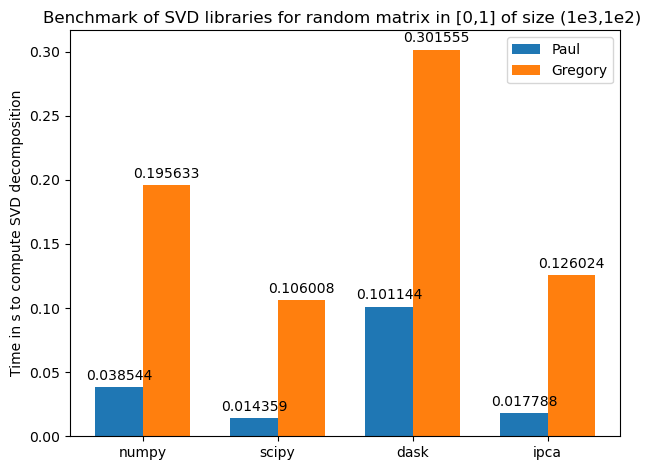

In [30]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, paul_values, width, label='Paul')
rects2 = ax.bar(x + width/2, gregory_values, width, label='Gregory')

ax.set_ylabel('Time in s to compute SVD decomposition')
ax.set_title("Benchmark of SVD libraries for random matrix in [0,1] of size (1e3,1e2) ")
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [55]:
df0 = df_dict["Paul"]
matrix_size = df0.columns[1:]
list(matrix_size)

['(1e3,1e2)', '(1e4,1e2)', '(1e5,1e3)']

In [56]:
# Comparison with the size
petite_values = []
moyenne_values = []
grande_values = []


for idx,label_name in enumerate(labels):
    petite_values.append( df0.loc[idx][matrix_size[0]])
    moyenne_values.append( df0.loc[idx][matrix_size[1]])
    grande_values.append( df0.loc[idx][matrix_size[2]])
print(petite_values)
print(moyenne_values)
print(grande_values)

[0.038544, 0.014359, 0.101144, 0.017788]
[0.238866, 0.088001, 0.056787, 0.989689]
[50.1592, 25.9825, 10.8333, 119.11]


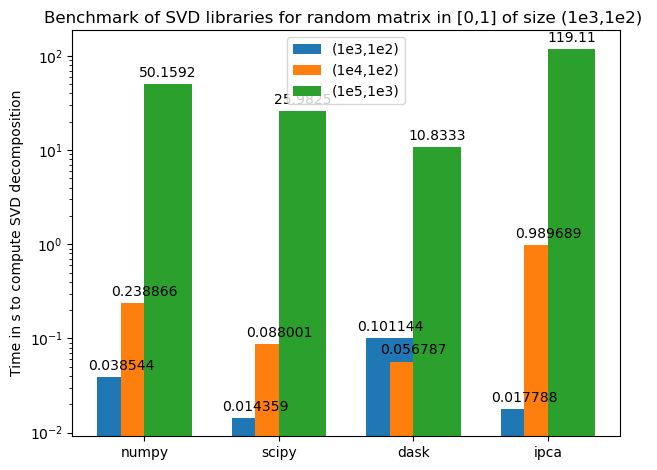

In [58]:


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()



rects1 = ax.bar(x - width/2, petite_values, width, label=matrix_size[0])
rects2 = ax.bar(x , moyenne_values, width, label=matrix_size[1])
rects3 = ax.bar(x + width/2, grande_values, width, label=matrix_size[2])


ax.set_ylabel('Time in s to compute SVD decomposition')
ax.set_yscale('log')
ax.set_title("Benchmark of SVD libraries for random matrix in [0,1] of size (1e3,1e2) ")
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)


fig.tight_layout()

plt.show()